In [1]:
!pip install numpy
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Install and prepare dataset

In [2]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
num_classes = 3
data = iris.data
targets = np.eye(num_classes)[iris.target]
dataset = [(data[i][None,...],targets[i]) for i in range(data.shape[0])]

from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(dataset, train_size=0.8, random_state=42)
print(f'Train: {len(train_dataset)} | Test: {len(test_dataset)}')

Train: 120 | Test: 30


# Model

In [3]:
class NN:
    def __init__(self, input_dim, hidden_dim,  output_dim, learning_rate=0.01):
        self.input_dim = input_dim #количество входных
        self.hidden_dim = hidden_dim #скрытых
        self.output_dim = output_dim #выходных слоев

        self.learning_rate = learning_rate #скорость обучения

        # initialize weights 1
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.b1 = np.random.randn(1, self.hidden_dim)

        # initialize weights 2
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)
        self.b2 = np.random.randn(1, self.output_dim)

    def forward(self, X):
        self.t1 = X @ self.W1 + self.b1
        self.h1 = self.sigmoid(self.t1)

        self.t2 = self.h1 @ self.W2 + self.b2
        self.pred = self.softmax(self.t2)
        return self.pred
    

    

    def backward(self, X, target, pred):
        
        dE_dt2 = pred - target
        dE_dW2 = self.h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)

        dE_dh1 = dE_dt2 @ self.W2.T
        dE_dt1 = dE_dh1 * self.sigmoid_derivative(self.t1)
        dE_dW1 = X.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        self.W1 -= self.learning_rate*dE_dW1
        self.b1 -= self.learning_rate*dE_db1
        self.W2 -= self.learning_rate*dE_dW2
        self.b2 -= self.learning_rate*dE_db2

    def relu(self, X):
        return np.maximum(0, X)

    def relu_derivative(self, X):
        return (X>=0).astype(float)

    def sigmoid(self, X):
        return 1 / (1 + np.exp(-X))
    
    def sigmoid_derivative(self, X):
        return self.sigmoid(X) * (1 - self.sigmoid(X))

    def softmax(self, X):
        out = np.exp(X)
        return out/np.sum(out, axis=1, keepdims = True)

    def cross_entropy_loss(self, target, pred):
        return -np.sum(target*np.log(pred))

# Train

In [15]:
np.random.seed(42)
model = NN(4, 5, 3)
num_epoch = 101

batch_size = 4
for epoch in range(num_epoch):
    loss_train = []
    for i in range(len(train_dataset)//batch_size):
      x_batch , y_batch = zip(*train_dataset[i*batch_size : i*batch_size + batch_size])
      X = np.concatenate(x_batch, axis = 0)
      target = np.array(y_batch)
      pred = model.forward(X)
      model.backward(X,target,pred)
      E = model.cross_entropy_loss(target, pred)
      loss_train.append(E)
    if epoch%10==0:
        print(f'Epoch: {epoch} | Error: {np.mean(loss_train)}')

def get_accuracy(dataset, model):
    acc = 0
    for X, target in dataset:
        pred = model.forward(X)
        if np.argmax(pred)==np.argmax(target):
            acc += 1
    return acc

acc_train = get_accuracy(train_dataset, model)
print(f'Accuracy Train: {np.round(acc_train/len(train_dataset)*100,2)}%')

acc_test = get_accuracy(test_dataset, model)
print(f'Accuracy Test: {np.round(acc_test/len(test_dataset)*100,2)}%')

Epoch: 0 | Error: 6.57416607328773
Epoch: 10 | Error: 2.7497496842206917
Epoch: 20 | Error: 2.316581328607222
Epoch: 30 | Error: 2.1394390911899843
Epoch: 40 | Error: 2.053006533081297
Epoch: 50 | Error: 2.002698146682684
Epoch: 60 | Error: 1.9675744292919148
Epoch: 70 | Error: 1.9317387952791882
Epoch: 80 | Error: 1.7514601776232763
Epoch: 90 | Error: 1.4737669867737728
Epoch: 100 | Error: 1.2139654962907513
Accuracy Train: 96.67%
Accuracy Test: 100.0%


1) Добавить еще один скрытый слой (реализовать трехслойный персептрон)
2) Улучшить качество модели путем подбора параметров сети (num_epochs, learning_rate, hidden dims and number of hidden layers). Построить графики ошибки обучения для 5-10 различных вариантов. Также попробуйте заменить функцию активации relu в скрытом слое на другие...

персептрон

In [16]:
class Perseptron:
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, output_dim, learning_rate=0.01):
        self.input_dim = input_dim #количество входных
        self.hidden_dim1 = hidden_dim1 #скрытых 1 го
        self.hidden_dim2 = hidden_dim2 #скрытых 2 го
        self.output_dim = output_dim #выходных слоев

        self.learning_rate = learning_rate #скорость обучения

        # initialize weights 1
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim1)
        self.b1 = np.random.randn(1, self.hidden_dim1)

        # initialize weights 2
        self.W2 = np.random.randn(self.hidden_dim1, self.hidden_dim2)
        self.b2 = np.random.randn(1, self.hidden_dim2)

        # initialize weights 3
        self.W3 = np.random.randn(self.hidden_dim2, self.output_dim)
        self.b3 = np.random.randn(1, self.output_dim)

    def forward(self, X):
        self.t1 = X @ self.W1 + self.b1
        self.h1 = self.relu(self.t1)

        self.t2 = self.h1 @ self.W2 + self.b2
        self.h2 = self.relu(self.t2)

        self.t3 = self.h2 @ self.W3 + self.b3
        self.pred = self.softmax(self.t3)
        return self.pred
    

    

    def backward(self, X, target, pred):
        dE_dt3 = pred - target
        dE_dW3 = self.h2.T @ dE_dt3
        dE_db3 = dE_dt3

        dE_dh2 = dE_dt3 @ self.W3.T
        dE_dt2 = dE_dh2 * self.relu_derivative(self.t2)
        dE_dW2 = self.h1.T @ dE_dt2
        dE_db2 = dE_dt2

        dE_dh1 = dE_dt2 @ self.W2.T
        dE_dt1 = dE_dh1 * self.relu_derivative(self.t1)
        dE_dW1 = X.T @ dE_dt1
        dE_db1 = dE_dt1

        self.W1 -= self.learning_rate*dE_dW1
        self.b1 -= self.learning_rate*dE_db1
        self.W2 -= self.learning_rate*dE_dW2
        self.b2 -= self.learning_rate*dE_db2
        self.W3 -= self.learning_rate*dE_dW3
        self.b3 -= self.learning_rate*dE_db3

    def relu(self, X):
        return np.maximum(0, X)

    def relu_derivative(self, X):
        return (X>=0).astype(float)

    def softmax(self, X):
        out = np.exp(X)
        return out/np.sum(out)

    def cross_entropy_loss(self, target, pred):
        return -np.sum(target*np.log(pred))

In [17]:
np.random.seed(46)
model_Perseptron = Perseptron(4, 7, 7, 3, learning_rate=0.001 )
num_epoch = 800

for epoch in range(num_epoch):
    loss_train = []
    for X, target in train_dataset:
        pred = model_Perseptron.forward(X)
        model_Perseptron.backward(X,target,pred)
        E = model_Perseptron.cross_entropy_loss(target, pred)
        loss_train.append(E)
    if epoch%10==0:
        print(f'Epoch: {epoch} | Error: {np.mean(loss_train)}')


def get_accuracy(dataset, model):
    acc = 0
    for X, target in dataset:
        pred = model.forward(X)
        if np.argmax(pred)==np.argmax(target):
            acc += 1
    return acc

acc_train_Perseptron = get_accuracy(train_dataset, model_Perseptron)
print(f'Accuracy Train: {np.round(acc_train_Perseptron/len(train_dataset)*100,2)}%')

acc_test_Perseptron = get_accuracy(test_dataset, model_Perseptron)
print(f'Accuracy Test: {np.round(acc_test_Perseptron/len(test_dataset)*100,2)}%')

Epoch: 0 | Error: 5.394783625380764
Epoch: 10 | Error: 0.8634206084874531
Epoch: 20 | Error: 0.604380239642605
Epoch: 30 | Error: 0.46192564963726407
Epoch: 40 | Error: 0.34177389913401574
Epoch: 50 | Error: 0.24570198078007063
Epoch: 60 | Error: 0.17773675608657874
Epoch: 70 | Error: 0.13551886880241035
Epoch: 80 | Error: 0.11394956299964513
Epoch: 90 | Error: 0.10192094814373488
Epoch: 100 | Error: 0.09430929476744847
Epoch: 110 | Error: 0.08940222949779247
Epoch: 120 | Error: 0.08604324176739403
Epoch: 130 | Error: 0.08366160436138204
Epoch: 140 | Error: 0.08208292864506547
Epoch: 150 | Error: 0.08093961708451483
Epoch: 160 | Error: 0.07989882700719081
Epoch: 170 | Error: 0.07918585781256159
Epoch: 180 | Error: 0.07880213540551256
Epoch: 190 | Error: 0.07833485319861397
Epoch: 200 | Error: 0.07784279150330073
Epoch: 210 | Error: 0.07731652696629669
Epoch: 220 | Error: 0.07681285831662873
Epoch: 230 | Error: 0.07662998482918436
Epoch: 240 | Error: 0.07637609115273598
Epoch: 250 | Err

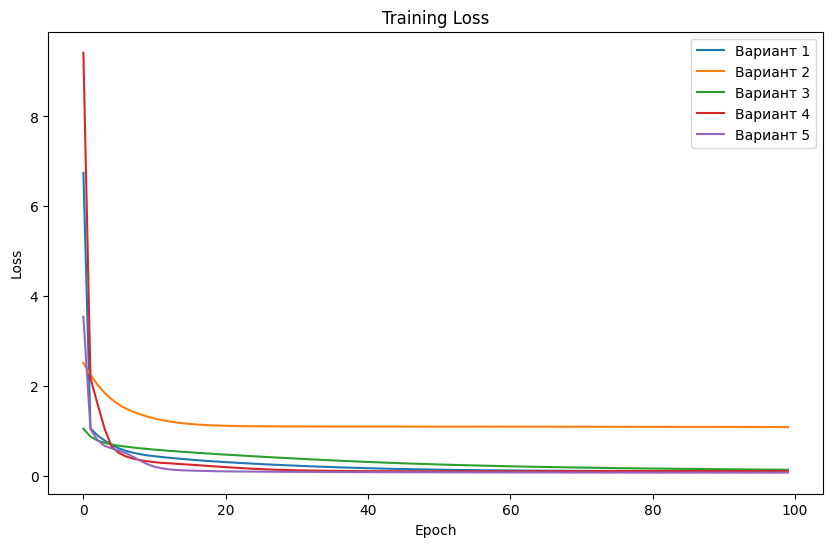

In [39]:

np.random.seed(48)

# Вариант 1
model_Perseptron_1 = Perseptron(4, 7, 7, 3, learning_rate=0.001)
num_epoch = 100

loss_train_1 = []
for epoch in range(num_epoch):
    loss_epoch = 0
    count = 0
    for X, target in train_dataset:
        pred = model_Perseptron_1.forward(X)
        model_Perseptron_1.backward(X, target, pred)
        E = model_Perseptron_1.cross_entropy_loss(target, pred)
        loss_epoch += E
        count += 1
    loss_train_1.append(loss_epoch / count)

# Вариант 2
model_Perseptron_2 = NN(4, 5, 3, learning_rate=0.001)
num_epoch = 100

loss_train_2 = []
for epoch in range(num_epoch):
    loss_epoch = 0
    count = 0
    for X, target in train_dataset:
        pred = model_Perseptron_2.forward(X)
        model_Perseptron_2.backward(X, target, pred)
        E = model_Perseptron_2.cross_entropy_loss(target, pred)
        loss_epoch += E
        count += 1
    loss_train_2.append(loss_epoch / count)


# Вариант 3
model_Perseptron_3 = NN(4, 5, 3, learning_rate=0.01)
num_epoch = 100

loss_train_3 = []
for epoch in range(num_epoch):
    loss_epoch = 0
    count = 0
    for X, target in train_dataset:
        pred = model_Perseptron_3.forward(X)
        model_Perseptron_3.backward(X, target, pred)
        E = model_Perseptron_3.cross_entropy_loss(target, pred)
        loss_epoch += E
        count += 1
    loss_train_3.append(loss_epoch / count)

# Вариант 4
model_Perseptron_4 = Perseptron(4, 6, 6, 3, learning_rate=0.001)
num_epoch = 100

loss_train_4 = []
for epoch in range(num_epoch):
    loss_epoch = 0
    count = 0
    for X, target in train_dataset:
        pred = model_Perseptron_4.forward(X)
        model_Perseptron_4.backward(X, target, pred)
        E = model_Perseptron_4.cross_entropy_loss(target, pred)
        loss_epoch += E
        count += 1
    loss_train_4.append(loss_epoch / count)

# Вариант 5
model_Perseptron_5 = Perseptron(4, 7, 10, 3, learning_rate=0.001)
num_epoch = 100

loss_train_5 = []
for epoch in range(num_epoch):
    loss_epoch = 0
    count = 0
    for X, target in train_dataset:
        pred = model_Perseptron_5.forward(X)
        model_Perseptron_5.backward(X, target, pred)
        E = model_Perseptron_5.cross_entropy_loss(target, pred)
        loss_epoch += E
        count += 1
    loss_train_5.append(loss_epoch / count)



# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(loss_train_1, label='Вариант 1')
plt.plot(loss_train_2, label='Вариант 2')
plt.plot(loss_train_3, label='Вариант 3')
plt.plot(loss_train_4, label='Вариант 4')
plt.plot(loss_train_5, label='Вариант 5')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()
